In [251]:
#importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from datetime import date
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
# Modeling & Accuracy Metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# Filtering out the warnings after Cell Execution
import warnings
warnings.filterwarnings('ignore')

# SLICING DATA 

In [252]:
#loading dataset
data_o=pd.read_csv(r"C:\Users\KIIT\Downloads\1805262.csv")
data_o.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200795490,HY - co,2020-01-16 00:00:00,2020.0,1.930337e+09,2019-12-31,20191231,20191231,20200115.0,USD,RV,1.0,NaN,15497.54,20191231.0,NAA8,1.930337e+09,0
1,U001,0200739534,OK llc,2019-12-27 00:00:00,2019.0,1.930273e+09,2019-12-12,20191212,20191212,20191227.0,USD,RV,1.0,NaN,91923.51,20191212.0,NAA8,1.930273e+09,0
2,U001,0200769623,WAL-MAR,2019-05-08 00:00:00,2019.0,1.929211e+09,2019-04-25,20190426,20190425,20190510.0,USD,RV,1.0,NaN,44707.23,20190425.0,NAH4,1.929211e+09,0
3,CA02,0140104429,COSTCO co,2020-01-31 00:00:00,2020.0,2.960605e+09,2020-01-06,20200106,20200106,20200126.0,CAD,RV,1.0,NaN,40382.41,20200116.0,CA10,2.960605e+09,0
4,U001,0200416837,DEC corporation,2019-06-25 00:00:00,2019.0,1.929514e+09,2019-06-19,20190619,20190619,20190623.0,USD,RV,1.0,NaN,6803.28,20190616.0,NAM1,1.929514e+09,0


In [253]:
#checking shape of dataset
data_o.shape

(50000, 19)

In [254]:
#finding column with no. of null
data_o.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                 3432
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    6
isOpen                        0
dtype: int64

In [255]:
 #we are storing records with clear_date is null, 
test_set = data_o[data_o['clear_date'].isna()]
test_set.reset_index(drop=True,inplace=True)
test_set.head()


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200762301,C&S WH systems,NaN,2020.0,1.930797e+09,2020-04-17,20200418,20200417,20200502.0,USD,RV,1.0,NaN,67617.27,20200417.0,NAC6,1.930797e+09,1
1,U001,0200794332,COST corporation,NaN,2020.0,1.930632e+09,2020-03-12,20200310,20200312,20200327.0,USD,RV,1.0,NaN,8793.09,20200312.0,NAAX,1.930632e+09,1
2,U013,0140103335,PARAM associates,NaN,2020.0,1.991842e+09,2020-04-10,20200406,20200410,20200510.0,USD,RV,1.0,NaN,1868.40,20200410.0,NAVE,1.991842e+09,1
3,U001,0200769623,WAL-MAR foundation,NaN,2020.0,1.930814e+09,2020-04-23,20200422,20200423,20200508.0,USD,RV,1.0,NaN,307.48,20200423.0,NAH4,1.930814e+09,1
4,U001,0200744019,TARG trust,NaN,2020.0,1.930690e+09,2020-03-25,20200324,20200325,20200409.0,USD,RV,1.0,NaN,4293.12,20200325.0,NAA8,1.930690e+09,1


In [256]:

#dropping the record which have clear_date is euql to null
data=data_o.dropna(axis=0,subset=['clear_date'])
data.reset_index(inplace=True, drop=True)
data.head()


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200795490,HY - co,2020-01-16 00:00:00,2020.0,1.930337e+09,2019-12-31,20191231,20191231,20200115.0,USD,RV,1.0,NaN,15497.54,20191231.0,NAA8,1.930337e+09,0
1,U001,0200739534,OK llc,2019-12-27 00:00:00,2019.0,1.930273e+09,2019-12-12,20191212,20191212,20191227.0,USD,RV,1.0,NaN,91923.51,20191212.0,NAA8,1.930273e+09,0
2,U001,0200769623,WAL-MAR,2019-05-08 00:00:00,2019.0,1.929211e+09,2019-04-25,20190426,20190425,20190510.0,USD,RV,1.0,NaN,44707.23,20190425.0,NAH4,1.929211e+09,0
3,CA02,0140104429,COSTCO co,2020-01-31 00:00:00,2020.0,2.960605e+09,2020-01-06,20200106,20200106,20200126.0,CAD,RV,1.0,NaN,40382.41,20200116.0,CA10,2.960605e+09,0
4,U001,0200416837,DEC corporation,2019-06-25 00:00:00,2019.0,1.929514e+09,2019-06-19,20190619,20190619,20190623.0,USD,RV,1.0,NaN,6803.28,20190616.0,NAM1,1.929514e+09,0


In [257]:
data.shape

(46568, 19)

In [258]:
data.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                    0
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             46568
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    6
isOpen                        0
dtype: int64

In [259]:
# no record have clear_date as null

# PREPROCESSING

In [260]:
#checking datatype  column
data.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
area_business             float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

In [261]:
#converting float to datetime
data['due_in_date']=pd.to_datetime(data['due_in_date'],format='%Y%m%d') 

In [262]:
data['baseline_create_date']=pd.to_datetime(data['baseline_create_date'],format='%Y%m%d %H:%M:%S.%f') 
#converting object into datetime 

In [263]:
data['clear_date']=pd.to_datetime(data_o['clear_date'],format='%Y%m%d %H:%M:%S.%f')
#converting float into datetime 

In [264]:
data['document_create_date']=pd.to_datetime(data['document_create_date'],format='%Y%m%d')
#converting int to datetime

In [265]:
data['document_create_date.1']=pd.to_datetime(data['document_create_date.1'],format='%Y%m%d')

***creating Target column***

In [266]:
#so now we will make a new column as delay_days which will be our target column
def delay_days(dataframe):
    dataframe["delay_days"] = dataframe["clear_date"]-dataframe["due_in_date"]

In [267]:
data['delay_days']=(data['clear_date']-data['due_in_date']).dt.days


In [268]:
delay_days(test_set)


In [269]:
test_set.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay_days
0,U001,0200762301,C&S WH systems,NaN,2020.0,1.930797e+09,2020-04-17,20200418,20200417,20200502.0,USD,RV,1.0,NaN,67617.27,20200417.0,NAC6,1.930797e+09,1,NaN
1,U001,0200794332,COST corporation,NaN,2020.0,1.930632e+09,2020-03-12,20200310,20200312,20200327.0,USD,RV,1.0,NaN,8793.09,20200312.0,NAAX,1.930632e+09,1,NaN
2,U013,0140103335,PARAM associates,NaN,2020.0,1.991842e+09,2020-04-10,20200406,20200410,20200510.0,USD,RV,1.0,NaN,1868.40,20200410.0,NAVE,1.991842e+09,1,NaN
3,U001,0200769623,WAL-MAR foundation,NaN,2020.0,1.930814e+09,2020-04-23,20200422,20200423,20200508.0,USD,RV,1.0,NaN,307.48,20200423.0,NAH4,1.930814e+09,1,NaN
4,U001,0200744019,TARG trust,NaN,2020.0,1.930690e+09,2020-03-25,20200324,20200325,20200409.0,USD,RV,1.0,NaN,4293.12,20200325.0,NAA8,1.930690e+09,1,NaN


In [270]:
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay_days
0,U001,0200795490,HY - co,2020-01-16,2020.0,1.930337e+09,2019-12-31,2019-12-31,2019-12-31,2020-01-15,USD,RV,1.0,NaN,15497.54,1970-01-01 00:00:00.020191231,NAA8,1.930337e+09,0,1
1,U001,0200739534,OK llc,2019-12-27,2019.0,1.930273e+09,2019-12-12,2019-12-12,2019-12-12,2019-12-27,USD,RV,1.0,NaN,91923.51,1970-01-01 00:00:00.020191212,NAA8,1.930273e+09,0,0
2,U001,0200769623,WAL-MAR,2019-05-08,2019.0,1.929211e+09,2019-04-25,2019-04-26,2019-04-25,2019-05-10,USD,RV,1.0,NaN,44707.23,1970-01-01 00:00:00.020190425,NAH4,1.929211e+09,0,-2
3,CA02,0140104429,COSTCO co,2020-01-31,2020.0,2.960605e+09,2020-01-06,2020-01-06,2020-01-06,2020-01-26,CAD,RV,1.0,NaN,40382.41,1970-01-01 00:00:00.020200116,CA10,2.960605e+09,0,5
4,U001,0200416837,DEC corporation,2019-06-25,2019.0,1.929514e+09,2019-06-19,2019-06-19,2019-06-19,2019-06-23,USD,RV,1.0,NaN,6803.28,1970-01-01 00:00:00.020190616,NAM1,1.929514e+09,0,2


In [271]:
#as we  remove -ve days
data['delay_days'].min()

-76

In [272]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46568 entries, 0 to 46567
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           46568 non-null  object        
 1   cust_number             46568 non-null  object        
 2   name_customer           46568 non-null  object        
 3   clear_date              46568 non-null  datetime64[ns]
 4   buisness_year           46568 non-null  float64       
 5   doc_id                  46568 non-null  float64       
 6   posting_date            46568 non-null  object        
 7   document_create_date    46568 non-null  datetime64[ns]
 8   document_create_date.1  46568 non-null  datetime64[ns]
 9   due_in_date             46568 non-null  datetime64[ns]
 10  invoice_currency        46568 non-null  object        
 11  document type           46568 non-null  object        
 12  posting_id              46568 non-null  float6

In [273]:
# we have converted the columns to numeric format, rest column like cust number,custname,ivoice_currency, document type are categorical,
#we will handle and analyse them later

***NULL IMPUTATION***

In [274]:
# checking the columns which have null value
data.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                    0
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             46568
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    6
isOpen                        0
delay_days                    0
dtype: int64

<AxesSubplot:>

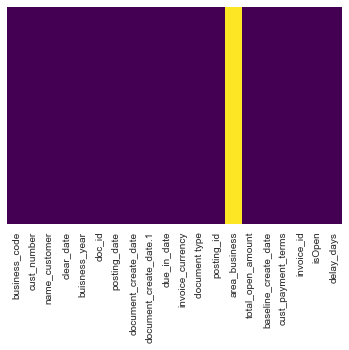

In [275]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [276]:

### from above visualisation. we come to know that area_business column have 100% null value.
#so, its better to remove such column
data=data.drop(labels=['area_business'],axis=1)
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay_days
0,U001,0200795490,HY - co,2020-01-16,2020.0,1.930337e+09,2019-12-31,2019-12-31,2019-12-31,2020-01-15,USD,RV,1.0,15497.54,1970-01-01 00:00:00.020191231,NAA8,1.930337e+09,0,1
1,U001,0200739534,OK llc,2019-12-27,2019.0,1.930273e+09,2019-12-12,2019-12-12,2019-12-12,2019-12-27,USD,RV,1.0,91923.51,1970-01-01 00:00:00.020191212,NAA8,1.930273e+09,0,0
2,U001,0200769623,WAL-MAR,2019-05-08,2019.0,1.929211e+09,2019-04-25,2019-04-26,2019-04-25,2019-05-10,USD,RV,1.0,44707.23,1970-01-01 00:00:00.020190425,NAH4,1.929211e+09,0,-2
3,CA02,0140104429,COSTCO co,2020-01-31,2020.0,2.960605e+09,2020-01-06,2020-01-06,2020-01-06,2020-01-26,CAD,RV,1.0,40382.41,1970-01-01 00:00:00.020200116,CA10,2.960605e+09,0,5
4,U001,0200416837,DEC corporation,2019-06-25,2019.0,1.929514e+09,2019-06-19,2019-06-19,2019-06-19,2019-06-23,USD,RV,1.0,6803.28,1970-01-01 00:00:00.020190616,NAM1,1.929514e+09,0,2


In [277]:
#lets see the correlation between doc_id and invoice_id

In [278]:

correlation=data[['doc_id','invoice_id']].corr()
correlation

,doc_id,invoice_id
doc_id,1.0,1.0
invoice_id,1.0,1.0


<AxesSubplot:>

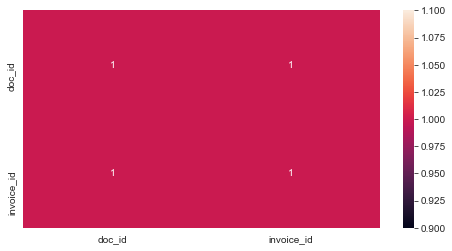

In [279]:

plt.subplots(figsize=(8,4))
sns.heatmap(correlation,annot=True)

In [280]:
# here we find invoice_id and doc_id are highly correlated as the coefficient is 1 , 
#also invoice id have 6 missing values we will remove invoice_id.

In [281]:
data=data.drop(labels=['invoice_id'],axis=1)
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay_days
0,U001,0200795490,HY - co,2020-01-16,2020.0,1.930337e+09,2019-12-31,2019-12-31,2019-12-31,2020-01-15,USD,RV,1.0,15497.54,1970-01-01 00:00:00.020191231,NAA8,0,1
1,U001,0200739534,OK llc,2019-12-27,2019.0,1.930273e+09,2019-12-12,2019-12-12,2019-12-12,2019-12-27,USD,RV,1.0,91923.51,1970-01-01 00:00:00.020191212,NAA8,0,0
2,U001,0200769623,WAL-MAR,2019-05-08,2019.0,1.929211e+09,2019-04-25,2019-04-26,2019-04-25,2019-05-10,USD,RV,1.0,44707.23,1970-01-01 00:00:00.020190425,NAH4,0,-2
3,CA02,0140104429,COSTCO co,2020-01-31,2020.0,2.960605e+09,2020-01-06,2020-01-06,2020-01-06,2020-01-26,CAD,RV,1.0,40382.41,1970-01-01 00:00:00.020200116,CA10,0,5
4,U001,0200416837,DEC corporation,2019-06-25,2019.0,1.929514e+09,2019-06-19,2019-06-19,2019-06-19,2019-06-23,USD,RV,1.0,6803.28,1970-01-01 00:00:00.020190616,NAM1,0,2


In [282]:
#again checking for null value
data.isnull().sum()

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
posting_id                0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
isOpen                    0
delay_days                0
dtype: int64

In [283]:
#all null values are handled

#to avoid discrepancy between document_create_date and document_create_date.1 we drop document_create_date and instead use document_create_date.1 which norm document_create_date

In [284]:
data.drop(columns = "document_create_date",axis=0,inplace = True)

In [285]:
# checking and removing duplicate column

In [286]:
data.duplicated().sum()

0

In [287]:
transposedTrain=data.T
transposedTrain.duplicated().sum()

0

In [288]:
#Identifying columns whose every value is unique

for cols in data.columns:
    print(f"{cols} - {data[f'{cols}'].nunique()}")

business_code - 6
cust_number - 1419
name_customer - 4200
clear_date - 402
buisness_year - 2
doc_id - 46568
posting_date - 424
document_create_date.1 - 425
due_in_date - 492
invoice_currency - 2
document type - 2
posting_id - 1
total_open_amount - 42089
baseline_create_date - 434
cust_payment_terms - 74
isOpen - 1
delay_days - 179


In [289]:
# as we see the column isOpen and posting_id have only 1 value, so we need to remove that

In [290]:
#REMOVAL OF CONSTANT COLUMNS i.e Columns which have the same value in the enitre dataset

unique_cols =  [x for x in data.columns if data[x].nunique()==1] 
print(unique_cols)
data.drop(unique_cols,axis=1,inplace=True)
data.columns

['posting_id', 'isOpen']


Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date.1',
       'due_in_date', 'invoice_currency', 'document type', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'delay_days'],
      dtype='object')

In [291]:

data.shape

(46568, 15)

In [292]:
data.info() #as we can see there are no null or nan values in our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46568 entries, 0 to 46567
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           46568 non-null  object        
 1   cust_number             46568 non-null  object        
 2   name_customer           46568 non-null  object        
 3   clear_date              46568 non-null  datetime64[ns]
 4   buisness_year           46568 non-null  float64       
 5   doc_id                  46568 non-null  float64       
 6   posting_date            46568 non-null  object        
 7   document_create_date.1  46568 non-null  datetime64[ns]
 8   due_in_date             46568 non-null  datetime64[ns]
 9   invoice_currency        46568 non-null  object        
 10  document type           46568 non-null  object        
 11  total_open_amount       46568 non-null  float64       
 12  baseline_create_date    46568 non-null  dateti

# SPLITTING DATASET

In [293]:
# we are going to split data set on date basis


In [294]:
data=data.sort_values(by=['document_create_date.1'], ascending=True)
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,delay_days
33377,CA02,0100054173,DIA corporation,2019-09-25,2019.0,9.500000e+09,2019-03-29,2018-12-21,2018-12-31,CAD,X2,255.00,1970-01-01 00:00:00.020181221,CA10,268
10048,U001,0200148860,DOLLA foundation,2019-01-14,2019.0,1.928540e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,16501.75,1970-01-01 00:00:00.020181230,NAA8,0
3172,U001,0200769623,WAL-MAR systems,2019-01-09,2019.0,1.928539e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,3424.07,1970-01-01 00:00:00.020181230,NAH4,-5
6239,U001,0200759878,SA llc,2019-01-15,2019.0,1.928540e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,14257.87,1970-01-01 00:00:00.020181230,NAH4,1
31812,U001,0200762301,C&S WH trust,2019-01-15,2019.0,1.928532e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,35530.13,1970-01-01 00:00:00.020181230,NAC6,1


In [295]:
print('latest date:',data['document_create_date.1'].max())

print('oldest date:',data['document_create_date.1'].min())


latest date: 2020-02-27 00:00:00
oldest date: 2018-12-21 00:00:00


In [296]:
# Splitting the initial dataframe into train and temp
# the dataframe is from '2018-12-07 to 2020-02-21'

train=data[data['document_create_date.1'].apply(lambda x: pd.to_datetime(x, format='%Y%m%d')) <= '2019-10-8'].copy()
temp=data[data['document_create_date.1'].apply(lambda x: pd.to_datetime(x, format='%Y%m%d')) > '2019-10-8'].copy()
train.shape, temp.shape

((32709, 15), (13859, 15))

In [297]:
data['document_create_date.1']

33377   2018-12-21
10048   2018-12-30
3172    2018-12-30
6239    2018-12-30
31812   2018-12-30
           ...    
24722   2020-02-27
19420   2020-02-27
28046   2020-02-27
21196   2020-02-27
15517   2020-02-27
Name: document_create_date.1, Length: 46568, dtype: datetime64[ns]

In [298]:
print("percentage of train dataset:",len(train)/len(data))
print("percentage of temp dataset:",len(temp)/len(data))
print(len(data))

percentage of train dataset: 0.7023922006528088
percentage of temp dataset: 0.2976077993471912
46568


***we observe that the way we splited the dataset adjusting the date,give the ratio 70:30 approximately***

In [299]:
# Spliting the temp into validation and test set

validation=temp[temp['document_create_date.1'].apply(lambda x: pd.to_datetime(x, format='%Y%m%d')) <= '2019-12-10'].copy()
test=temp[temp['document_create_date.1'].apply(lambda x: pd.to_datetime(x, format='%Y%m%d')) > '2019-12-10'].copy()
validation.shape, test.shape

((6932, 15), (6927, 15))

In [300]:
print("percentage of validaton dataset:",len(validation)/len(data))
print("percentage of test dataset:",len(test)/len(data))


percentage of validaton dataset: 0.14885758460745577
percentage of test dataset: 0.14875021473973543


***we observe that the way we splited the tempdatset into validation and test , give 50:50 ratio.In over all the dataset is approximately divided into train:validation:test=70:15:15***

In [301]:
#Spliting dataset into x and y cordinates where x will have features column and y will have target column

In [302]:
y_train=train['delay_days']
x_train=train.drop('delay_days',axis=1)

x_train.shape,y_train.shape

((32709, 14), (32709,))

In [303]:
y_validation=validation['delay_days'] 
x_validation=validation.drop('delay_days',axis=1)
                                              
x_validation.shape,y_validation.shape

((6932, 14), (6932,))

In [304]:
y_test=test['delay_days'] 
x_test=test.drop('delay_days',axis=1)
                                             
x_test.shape,y_test.shape

((6927, 14), (6927,))

In [305]:
y_test.head()

38668   -3
43423    1
29372    1
44263    4
11268    4
Name: delay_days, dtype: int64

# EDA

In [306]:
x_train.duplicated().sum()

0

In [307]:
transposedTrain=x_train.T
transposedTrain.duplicated().sum()

0

***No duplicates columns***

***EDA on Training set***

In [308]:
x_train.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date.1',
       'due_in_date', 'invoice_currency', 'document type', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms'],
      dtype='object')

In [309]:
x_train.dtypes


business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date                      object
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
dtype: object

In [310]:
# list all numerical column together
numerical_columns=list(x_train.select_dtypes(include=np.number))
numerical_columns

['buisness_year', 'doc_id', 'total_open_amount']

In [311]:
x_train[numerical_columns].describe()

,buisness_year,doc_id,total_open_amount
count,32709.0,3.270900e+04,32709.000000
mean,2019.0,2.013776e+09,31681.284525
std,0.0,2.967244e+08,40122.746740
min,2019.0,1.928505e+09,1.030000
25%,2019.0,1.928993e+09,4462.240000
50%,2019.0,1.929420e+09,16850.420000
75%,2019.0,1.929769e+09,45313.820000
max,2019.0,9.500000e+09,792010.970000


In [312]:
# as business_year column have standard deviation equals to 0, it means it is constant columns

In [313]:
x_train[numerical_columns].skew()

buisness_year        0.000000
doc_id               5.509700
total_open_amount    3.028552
dtype: float64

In [314]:
# as we know skew value should be the range of (-0.5 to 0.5), and here columns['doc_id',total_open_amount,baseline_create_date and invoice_id] is high, so we will do log transform

In [315]:
# separate categorical column from numerical column
categorical_columns=list(x_train.columns[x_train.dtypes=='object'])
categorical_columns

['business_code',
 'cust_number',
 'name_customer',
 'posting_date',
 'invoice_currency',
 'document type',
 'cust_payment_terms']

In [316]:
# no. of unique value in each categorical_columns
x_train[categorical_columns].nunique()

business_code            6
cust_number           1310
name_customer         3628
posting_date           283
invoice_currency         2
document type            2
cust_payment_terms      66
dtype: int64

In [317]:
#display categorical_column unique value
for col in categorical_columns:
    print(col)
    print(x_train[col].unique(),'\n')


business_code
['CA02' 'U001' 'U013' 'U002' 'U005' 'U007'] 

cust_number
['0100054173' '0200148860' '0200769623' ... '0200164995' '0200609718'
 '0100043946'] 

name_customer
['DIA corporation' 'DOLLA foundation' 'WAL-MAR systems' ... 'BI MA trust'
 "D'B foundation" 'INDIANH llc'] 

posting_date
['2019-03-29' '2018-12-30' '2018-12-31' '2019-01-01' '2019-01-02'
 '2019-01-03' '2019-01-04' '2019-01-05' '2019-01-06' '2019-01-07'
 '2019-01-08' '2019-01-09' '2019-01-10' '2019-01-11' '2019-01-12'
 '2019-01-13' '2019-01-14' '2019-01-15' '2019-01-16' '2019-01-17'
 '2019-01-18' '2019-01-19' '2019-01-20' '2019-01-21' '2019-01-22'
 '2019-01-23' '2019-01-24' '2019-01-25' '2019-01-26' '2019-01-27'
 '2019-01-28' '2019-01-29' '2019-01-30' '2019-01-31' '2019-02-01'
 '2019-02-02' '2019-02-03' '2019-02-04' '2019-02-05' '2019-02-06'
 '2019-02-07' '2019-02-08' '2019-02-09' '2019-02-10' '2019-02-11'
 '2019-02-12' '2019-02-13' '2019-02-14' '2019-02-15' '2019-02-16'
 '2019-02-17' '2019-02-18' '2019-02-19' '2019

***We can create a new column from business_code which will store only the string part of the values as we can see that those are repeated in the data(EX: U and CA)
we can see there is two types value in invoice_currency(USD and CAD) and in document type column(RV and X2) .
Also the column Cust_payement_terms have 67 .And 
There is no constant categorical column as there is no singular unique value in any of the unique list.
We need to encode the those categorical columns.
Also customer name and number have large no of unique value but they wont helpful in predicting so we wont be including those.***




# VISUALIZATION

In [318]:
clear_month = x_train['clear_date'].dt.month
clear_month.value_counts()

5     3945
4     3800
8     3553
7     3514
9     3437
3     3429
6     3358
2     2895
10    2668
1     1641
11     408
12      61
Name: clear_date, dtype: int64

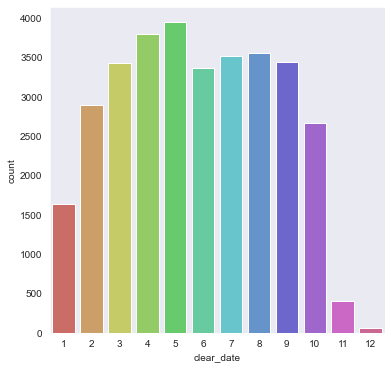

In [319]:
# visualizing the month in which the maximum custmer has cleared payment
plt.figure(figsize=(6,6)) 
sns.set_style('dark')
sns.countplot(x=clear_month, palette="hls")
plt.show() 



In [320]:
# we can see the clearing of dues increases from feb and maximum is done in May and it is less done month of dec.

In [321]:
x_train["document_create_date.1"].min() #checking for document_create_date.1 i.e the document on which the invoice was created

Timestamp('2018-12-21 00:00:00')

In [322]:
x_train["document_create_date.1"].max()



Timestamp('2019-10-08 00:00:00')

In [323]:
#form here we see that document creation is done from 2018-12-21 to 2019-10-08

In [324]:
doc_create_month = x_train["document_create_date.1"].dt.month
doc_create_month.value_counts()

3     3891
5     3698
6     3601
8     3597
4     3589
7     3417
9     3411
1     3238
2     3160
10     958
12     149
Name: document_create_date.1, dtype: int64

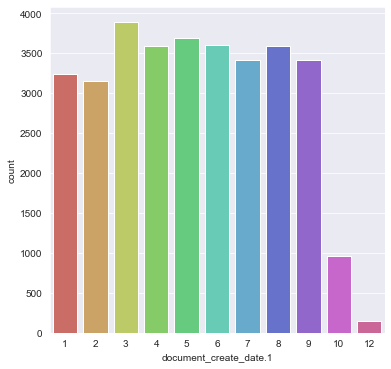

In [325]:
plot_count(doc_create_month, palette = "hls")

#from the graph we see that document creation fro each month decreases

In [326]:
# we see that there is document created in month of nov.

<AxesSubplot:ylabel='total_open_amount'>

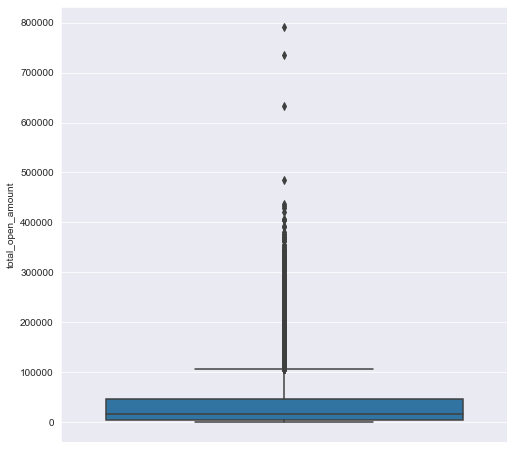

In [327]:
plt.figure(figsize=(8,8))
sns.boxplot(y =x_train['total_open_amount'])

We observe that maximum company have total_open_amount less than 1 lakh .

# FEATURE ENGINEERING


***Binarization***

In [328]:
x_train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms
33377,CA02,0100054173,DIA corporation,2019-09-25,2019.0,9.500000e+09,2019-03-29,2018-12-21,2018-12-31,CAD,X2,255.00,1970-01-01 00:00:00.020181221,CA10
10048,U001,0200148860,DOLLA foundation,2019-01-14,2019.0,1.928540e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,16501.75,1970-01-01 00:00:00.020181230,NAA8
3172,U001,0200769623,WAL-MAR systems,2019-01-09,2019.0,1.928539e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,3424.07,1970-01-01 00:00:00.020181230,NAH4
6239,U001,0200759878,SA llc,2019-01-15,2019.0,1.928540e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,14257.87,1970-01-01 00:00:00.020181230,NAH4
31812,U001,0200762301,C&S WH trust,2019-01-15,2019.0,1.928532e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,35530.13,1970-01-01 00:00:00.020181230,NAC6


In [329]:
x_train['buisness_year'].nunique()

1

In [330]:
x_train['buisness_year'].nunique()
x_test['buisness_year'].nunique()

2

In [331]:
x_train['buisness_year'].nunique()
x_test['buisness_year'].nunique()
x_validation['buisness_year'].nunique()

1

In [332]:
#we can see business year distribution , and it shows it wont have feed this to our model

In [333]:
# assigning value 1 to invoice_currency =USD and CAD as 0
x_train['invoice_currency']=np.where(x_train['invoice_currency']=='USD',1,0)

In [334]:
# doing the same on test and validation set
x_validation['invoice_currency']=np.where(x_validation['invoice_currency']=='USD',1,0)
x_test['invoice_currency']=np.where(x_test['invoice_currency']=='USD',1,0)


In [335]:
#assigning value 1 to document type =X2 and RV as 0
x_train['document type']=np.where(x_train['document type']=='X2',1,0)

In [336]:
# doing the same on test and validation set
x_validation['document type']=np.where(x_validation['document type']=='USD',1,0)
x_test['document type']=np.where(x_test['document type']=='USD',1,0)


In [337]:
#label encoding

In [338]:
 x_train.insert(3, "CustNumber",label.fit_transform(x_train['cust_number']))

In [339]:
 x_test.insert(3, "CustNumber",label.fit_transform(x_test['cust_number']))

In [340]:
x_validation.insert(3,"CustNumber", label.fit_transform(x_validation['cust_number']))

In [341]:
x_train.insert(13, "document_type_label",label.fit_transform(x_train['document type']))
x_validation.insert(13, "document_type_label",label.fit_transform(x_validation['document type']))
x_test.insert(13, "document_type_label",label.fit_transform(x_test['document type']))

In [342]:
x_train.head()

,business_code,cust_number,name_customer,CustNumber,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,document_type_label,baseline_create_date,cust_payment_terms
33377,CA02,0100054173,DIA corporation,274,2019-09-25,2019.0,9.500000e+09,2019-03-29,2018-12-21,2018-12-31,0,1,255.00,1,1970-01-01 00:00:00.020181221,CA10
10048,U001,0200148860,DOLLA foundation,455,2019-01-14,2019.0,1.928540e+09,2018-12-30,2018-12-30,2019-01-14,1,0,16501.75,0,1970-01-01 00:00:00.020181230,NAA8
3172,U001,0200769623,WAL-MAR systems,781,2019-01-09,2019.0,1.928539e+09,2018-12-30,2018-12-30,2019-01-14,1,0,3424.07,0,1970-01-01 00:00:00.020181230,NAH4
6239,U001,0200759878,SA llc,760,2019-01-15,2019.0,1.928540e+09,2018-12-30,2018-12-30,2019-01-14,1,0,14257.87,0,1970-01-01 00:00:00.020181230,NAH4
31812,U001,0200762301,C&S WH trust,765,2019-01-15,2019.0,1.928532e+09,2018-12-30,2018-12-30,2019-01-14,1,0,35530.13,0,1970-01-01 00:00:00.020181230,NAC6


In [343]:
# lets extract from date column

In [344]:
x_train['month'] = x_train['clear_date'].dt.month #finding month of clear_date
x_validation['month'] = x_validation['clear_date'].dt.month
x_test['month'] = x_test['clear_date'].dt.month

In [345]:
 #finding of dayofweek
x_train['dayofweek'] = x_train['clear_date'].dt.dayofweek
x_validation['dayofweek'] = x_validation['clear_date'].dt.dayofweek
x_test['dayofweek'] = x_test['clear_date'].dt.dayofweek

In [346]:
 #checking whether dayofweek is weekend and binarize them
#5th and 6th day of the week counts as Sat and Sun , so we mark them as 1
x_train['isweekend']=np.where(x_train['dayofweek'].isin([5,6]),1,0)
x_validation['isweekend']=np.where(x_validation['dayofweek'].isin([5,6]),1,0)
x_test['isweekend']=np.where(x_test['dayofweek'].isin([5,6]),1,0)

***Bining the total_oepn_amount***

In [347]:
#Based on total_open_amount we are dividing in quartiles
x_train['AmountQuantile']= pd.qcut(x_train['total_open_amount'], q = 4, labels =[1,2,3,4])
x_validation['AmountQuantile']= pd.qcut(x_validation['total_open_amount'], q = 4, labels =[1,2,3,4])
x_test['AmountQuantile']= pd.qcut(x_test['total_open_amount'], q = 4, labels =[1,2,3,4])

In [348]:
x_train.groupby("AmountQuantile")["total_open_amount"].agg({"mean", "count","max"})

,max,count,mean
AmountQuantile,,,
1,4462.24,8178,1510.471716
2,16850.42,8177,10728.639534
3,45313.82,8177,28684.590802
4,792010.97,8177,85805.125764


In [349]:
x_train['cust_number']=x_train['cust_number'].astype(str)

In [350]:
#bining total_open_amount
amtbins = [-1,5000,50000,200000,500000,1000000]
labels =[1,2,3,4,5]
x_train['amtbucket'] = pd.cut(x_train['total_open_amount'],amtbins,labels=labels)
x_validation['amtbucket'] = pd.cut(x_validation['total_open_amount'],amtbins,labels=labels)
x_test['amtbucket']=pd.cut(x_test['total_open_amount'],amtbins,labels=labels)
x_train.head()


,business_code,cust_number,name_customer,CustNumber,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,...,document type,total_open_amount,document_type_label,baseline_create_date,cust_payment_terms,month,dayofweek,isweekend,AmountQuantile,amtbucket
33377,CA02,0100054173,DIA corporation,274,2019-09-25,2019.0,9.500000e+09,2019-03-29,2018-12-21,2018-12-31,...,1,255.00,1,1970-01-01 00:00:00.020181221,CA10,9,2,0,1,1
10048,U001,0200148860,DOLLA foundation,455,2019-01-14,2019.0,1.928540e+09,2018-12-30,2018-12-30,2019-01-14,...,0,16501.75,0,1970-01-01 00:00:00.020181230,NAA8,1,0,0,2,2
3172,U001,0200769623,WAL-MAR systems,781,2019-01-09,2019.0,1.928539e+09,2018-12-30,2018-12-30,2019-01-14,...,0,3424.07,0,1970-01-01 00:00:00.020181230,NAH4,1,2,0,1,1
6239,U001,0200759878,SA llc,760,2019-01-15,2019.0,1.928540e+09,2018-12-30,2018-12-30,2019-01-14,...,0,14257.87,0,1970-01-01 00:00:00.020181230,NAH4,1,1,0,2,2
31812,U001,0200762301,C&S WH trust,765,2019-01-15,2019.0,1.928532e+09,2018-12-30,2018-12-30,2019-01-14,...,0,35530.13,0,1970-01-01 00:00:00.020181230,NAC6,1,1,0,3,2


In [351]:
#binning delay_days
bins = [-1000,-1, 15, 30, 45, 60, 1000000000]
labels =[0,1,2,3,4,5]
x_train['bucket'] = pd.cut(y_train, bins,labels=labels)
x_validation['bucket'] = pd.cut(y_validation, bins,labels=labels)
x_test['bucket']=pd.cut(y_test,bins,labels=labels)
x_validation.head()

,business_code,cust_number,name_customer,CustNumber,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,...,total_open_amount,document_type_label,baseline_create_date,cust_payment_terms,month,dayofweek,isweekend,AmountQuantile,amtbucket,bucket
27461,U001,0200769623,WAL-MAR us,417,2019-10-28,2019.0,1.929984e+09,2019-10-09,2019-10-09,2019-10-24,...,806.58,0,1970-01-01 00:00:00.020191009,NAH4,10,0,0,1,1,1
13225,U013,0100009932,SYSCO IN in,13,2019-11-12,2019.0,1.991833e+09,2019-10-09,2019-10-09,2019-11-08,...,20084.19,0,1970-01-01 00:00:00.020191009,NAVE,11,1,0,3,2,1
16807,U001,0200777735,NASH corp,429,2019-10-22,2019.0,1.929982e+09,2019-10-09,2019-10-09,2019-10-24,...,8314.38,0,1970-01-01 00:00:00.020191009,NAA8,10,1,0,2,2,0
44184,U001,0200769623,WAL-MAR us,417,2019-10-21,2019.0,1.929979e+09,2019-10-09,2019-10-09,2019-10-24,...,14503.97,0,1970-01-01 00:00:00.020191009,NAH4,10,0,0,2,2,0
8880,U001,0200792293,UNIFIE associates,465,2019-10-24,2019.0,1.929984e+09,2019-10-09,2019-10-09,2019-10-24,...,111402.02,0,1970-01-01 00:00:00.020191009,NAA8,10,3,0,4,3,1


In [352]:
LE = LabelEncoder()
x_train['amtbucket'] = LE.fit_transform(x_train['amtbucket'])
x_train['bucket'] = LE.fit_transform(x_train['bucket'])
x_train['AmountQuantile'] = LE.fit_transform(x_train['AmountQuantile'])
x_validation['amtbucket'] = LE.fit_transform(x_validation['amtbucket'])
x_validation['bucket'] = LE.fit_transform(x_validation['bucket'])
x_validation['AmountQuantile'] = LE.fit_transform(x_validation['AmountQuantile'])
x_test['amtbucket'] = LE.fit_transform(x_test['amtbucket'])
x_test['bucket'] = LE.fit_transform(x_test['bucket'])
x_test['AmountQuantile'] = LE.fit_transform(x_test['AmountQuantile'])

# FEATURE SELECTION


In [353]:
print(x_train['buisness_year'].nunique())


1


In [354]:
# as we can see the distribution of buisness_year  column , it wont have effect on prediction,lets drop it

In [355]:
x_train=x_train.drop(labels=['buisness_year'],axis=1)

In [356]:
x_train.columns

Index(['business_code', 'cust_number', 'name_customer', 'CustNumber',
       'clear_date', 'doc_id', 'posting_date', 'document_create_date.1',
       'due_in_date', 'invoice_currency', 'document type', 'total_open_amount',
       'document_type_label', 'baseline_create_date', 'cust_payment_terms',
       'month', 'dayofweek', 'isweekend', 'AmountQuantile', 'amtbucket',
       'bucket'],
      dtype='object')

<AxesSubplot:>

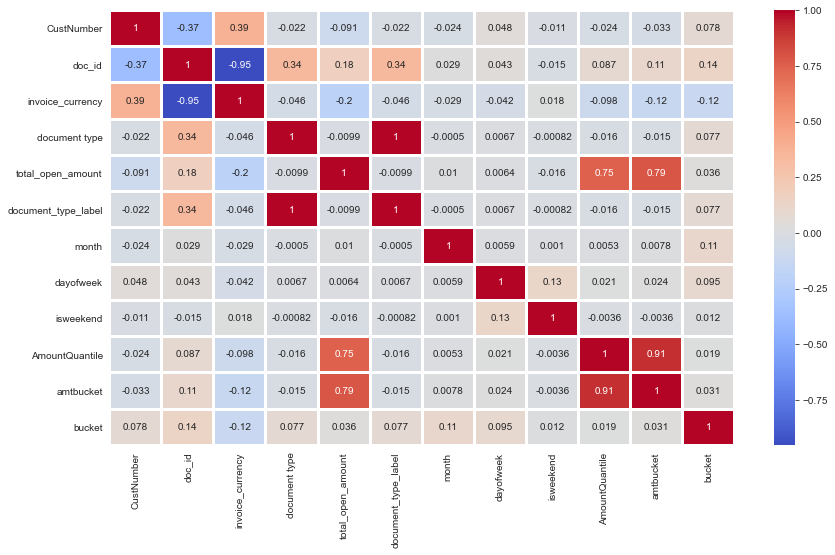

In [357]:
#Correlation between various columns
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns.heatmap(x_train.corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2)

In [358]:
# we see that document_type and document_type_label is highly correlated 

In [359]:
#selecting features

In [360]:
x_train1=x_train[['CustNumber','doc_id','total_open_amount','amtbucket','month','AmountQuantile','bucket','isweekend']].copy()

In [361]:
x_validation1=x_validation[['CustNumber','doc_id','total_open_amount','amtbucket','month','AmountQuantile','bucket','isweekend']].copy()

In [362]:
x_test1=x_test[['CustNumber','doc_id','total_open_amount','amtbucket','month','AmountQuantile','bucket','isweekend']].copy()

In [363]:
x_train_new=x_train.copy()

In [364]:
def handling_correlation(df,threshold=0.8):
    # creating set to hold the correlated features
    corr_features = set()
    # create the correlation matrix (default to pearson)
    corr_matrix = df.corr()
    #code for selecting all correleated features
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)
    

In [365]:
handling_correlation(x_train1.copy(),0.3) 

['AmountQuantile', 'amtbucket', 'doc_id']

In [366]:
x_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32709 entries, 33377 to 15489
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustNumber         32709 non-null  int32  
 1   doc_id             32709 non-null  float64
 2   total_open_amount  32709 non-null  float64
 3   amtbucket          32709 non-null  int64  
 4   month              32709 non-null  int64  
 5   AmountQuantile     32709 non-null  int64  
 6   bucket             32709 non-null  int64  
 7   isweekend          32709 non-null  int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 3.2 MB


In [367]:
x_test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6927 entries, 38668 to 15517
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustNumber         6927 non-null   int32  
 1   doc_id             6927 non-null   float64
 2   total_open_amount  6927 non-null   float64
 3   amtbucket          6927 non-null   int64  
 4   month              6927 non-null   int64  
 5   AmountQuantile     6927 non-null   int64  
 6   bucket             6927 non-null   int64  
 7   isweekend          6927 non-null   int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 432.9 KB


In [368]:
def tree_based_feature_importance(x_train,y_train):
    from sklearn.ensemble import RandomForestRegressor
    # create the random forest model
    model = RandomForestRegressor(n_estimators=130)

    # fit the model to start training.
    model.fit(x_train, y_train)

    # get the importance of the resulting features.
    importances = model.feature_importances_

    # create a data frame for visualization.
    final_df = pd.DataFrame({"Features": x_train.columns, "Importances":importances})
    final_df.set_index('Importances')

    # sort in descending order 
    final_df = final_df.sort_values('Importances',ascending=False)
    
    #visualising feature importance
    pd.Series(model.feature_importances_, index=x_train.columns).nlargest(8).plot(kind='barh')  
    return final_df

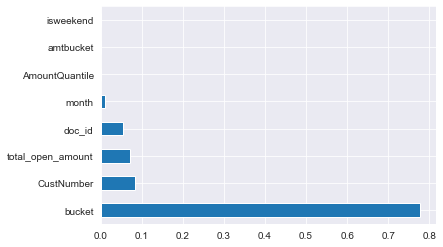

In [369]:
feature_importance=tree_based_feature_importance(x_train1,y_train)

# MODELLING

In [370]:
# Fitting Random Forest Regressor Tree to the Training Set
classifier = RandomForestClassifier()
classifier.fit(x_train1, y_train)
y_pred = classifier.predict(x_test1)
y_pred[:20]


array([-2,  2,  5,  0,  3,  1,  1,  6,  0, -1,  6,  1,  1, -1,  3, -8,  0,
        2,  1,  0], dtype=int64)

In [371]:
confusion_matrix(y_test, y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [373]:
# Calculating MSE_score and R2_score
#MSE: Mean Square Error. (measure of how well a regression line fits the data points)
#r2 score. (R-squared is a statistical measure of how close the data are to the fitted regression line.)
MSE_Score=(mean_squared_error(y_test, y_pred))
R2_Score=(r2_score(y_test, y_pred))

In [374]:
print(MSE_Score)

47.39223329002454


In [375]:
print(R2_Score)

0.5570967633266569
